In [12]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from sklearn.preprocessing import MinMaxScaler

In [13]:
hig_path = Path('data_files') / 'hig_kw_15min.csv'
parking_path = Path('data_files') / 'pv_lower_campus_parking_structure_phaseII_15min.csv'

with hig_path.open('r') as file:
    hig_kw = pd.read_csv(file)
print(list(hig_kw.columns))

with parking_path.open('r') as file:
    parking_kw = pd.read_csv(file)
print(list(parking_kw.columns))

['data_source', 'building_complex_name', 'building_complex_id', 'datetime', 'end_use', 'kw_average']
['building_complex_id', 'building_complex_name', 'datetime', 'kw_average']


In [14]:
hig_cols = ['data',
            'building_name',
            'building_id',
            'datetime',
            'end_use',
            'kw']
hig_list = list(hig_kw.columns)
hig_dict = {hig_list[i] : hig_cols[i] for i in range(len(hig_list))}
hig_kw = hig_kw.rename(columns=hig_dict)

parking_cols = ['building_id',
                'building_name',
                'datetime',
                'kw']
parking_list = list(parking_kw.columns)
parking_dict = {parking_list[i] : parking_cols[i] for i in range(len(parking_list))}
parking_kw = parking_kw.rename(columns=parking_dict)

print(list(hig_kw.columns))
print(list(parking_kw.columns))

['data', 'building_name', 'building_id', 'datetime', 'end_use', 'kw']
['building_id', 'building_name', 'datetime', 'kw']


In [15]:
print(hig_kw.dtypes)
print(parking_kw.dtypes)


data              object
building_name     object
building_id       object
datetime          object
end_use           object
kw               float64
dtype: object
building_id       object
building_name     object
datetime          object
kw               float64
dtype: object


In [16]:
hig_kw.datetime = pd.to_datetime(hig_kw.datetime)
parking_kw.datetime = pd.to_datetime(parking_kw.datetime)
print(hig_kw.dtypes)
print(parking_kw.dtypes)

data                     object
building_name            object
building_id              object
datetime         datetime64[ns]
end_use                  object
kw                      float64
dtype: object
building_id              object
building_name            object
datetime         datetime64[ns]
kw                      float64
dtype: object


In [17]:
hig_kw.set_index('datetime', inplace=True)
hig_kw = hig_kw.sort_index(ascending=True)

parking_kw.set_index('datetime', inplace=True)
parking_kw = parking_kw.sort_index(ascending=True)

In [18]:

hig_kw['kwh'] = hig_kw.kw*0.25
hig = hig_kw[['kw', 'kwh']]

parking_kw['kwh'] = parking_kw.kw*0.25
parking = parking_kw[['kw', 'kwh']]
parking.head(50)

,kw,kwh
datetime,,
2021-07-01 00:00:00,-0.082,-0.02050
2021-07-01 00:15:00,-0.082,-0.02050
2021-07-01 00:30:00,-0.087,-0.02175
2021-07-01 00:45:00,-0.089,-0.02225
2021-07-01 01:00:00,-0.082,-0.02050
2021-07-01 01:15:00,-0.079,-0.01975
2021-07-01 01:30:00,-0.084,-0.02100
2021-07-01 01:45:00,-0.086,-0.02150
2021-07-01 02:00:00,-0.081,-0.02025


Text(0, 0.5, 'Production (kW)')

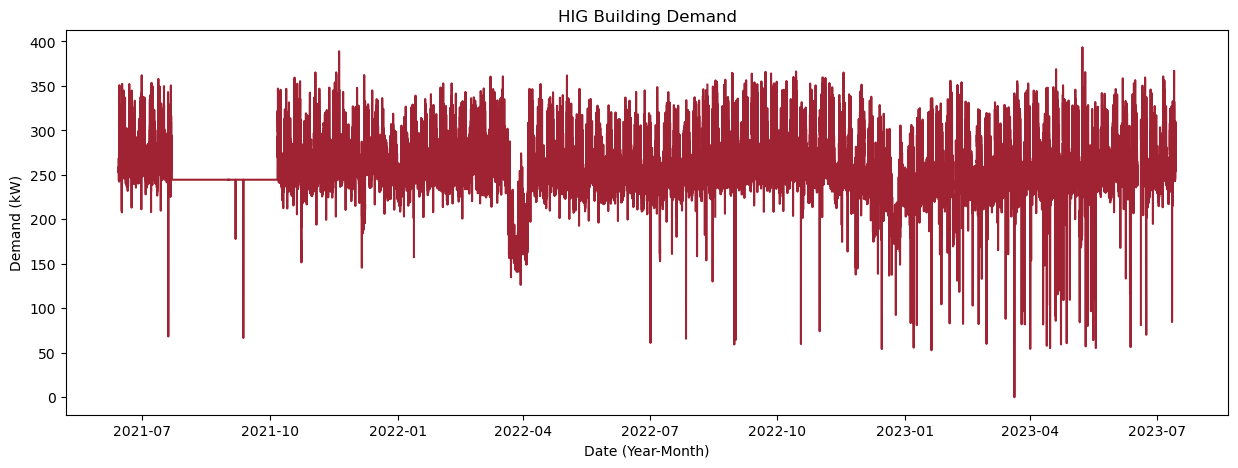

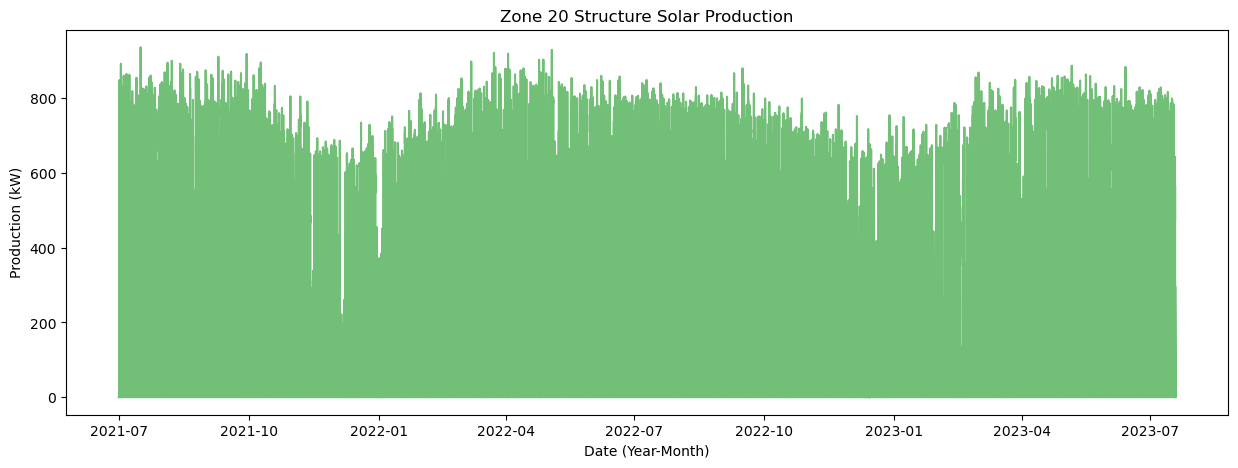

In [19]:
plt.figure(figsize=(15,5))
plt.plot(hig.index, hig.kw, c="#A02334")
plt.title("HIG Building Demand")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Demand (kW)")

plt.figure(figsize=(15,5))
plt.plot(parking.index, parking.kw, c='#72BF78')
plt.title("Zone 20 Structure Solar Production")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Production (kW)")

MY WORK

In [20]:
#Rescaling
#hig_numerical_cols = hig_kw.select_dtypes(include=['float64', 'int64']).columns
parking_numerical_cols = parking_kw.select_dtypes(include=['float64', 'int64']).columns
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 268))  

# Fit and transform the data
#hig_kw[hig_numerical_cols] = scaler.fit_transform(hig_kw[hig_numerical_cols])
parking_kw[parking_numerical_cols] = scaler.fit_transform(parking_kw[parking_numerical_cols])

# print(hig_kw[hig_numerical_cols]['kw'])
# print(hig_kw['kw'])
# print(parking_kw[parking_numerical_cols]['kw'])

In [21]:
#pd.merge to merge data into 1 table
pvload = pd.merge(hig, parking_kw, left_index=True, right_index=True, how='inner')
pvload.head()

,kw_x,kwh_x,building_id,building_name,kw_y,kwh_y
datetime,,,,,,
2021-07-01 00:00:00,266.90,66.7250,1001A,LOWER CAMPUS PARKING STRUCTURE - PHASE II,0.007441,0.007441
2021-07-01 00:15:00,255.86,63.9650,1001A,LOWER CAMPUS PARKING STRUCTURE - PHASE II,0.007441,0.007441
2021-07-01 00:30:00,261.41,65.3525,1001A,LOWER CAMPUS PARKING STRUCTURE - PHASE II,0.006010,0.006010
2021-07-01 00:45:00,269.16,67.2900,1001A,LOWER CAMPUS PARKING STRUCTURE - PHASE II,0.005438,0.005438
2021-07-01 01:00:00,288.50,72.1250,1001A,LOWER CAMPUS PARKING STRUCTURE - PHASE II,0.007441,0.007441


Text(0, 0.5, 'Power (kw)')

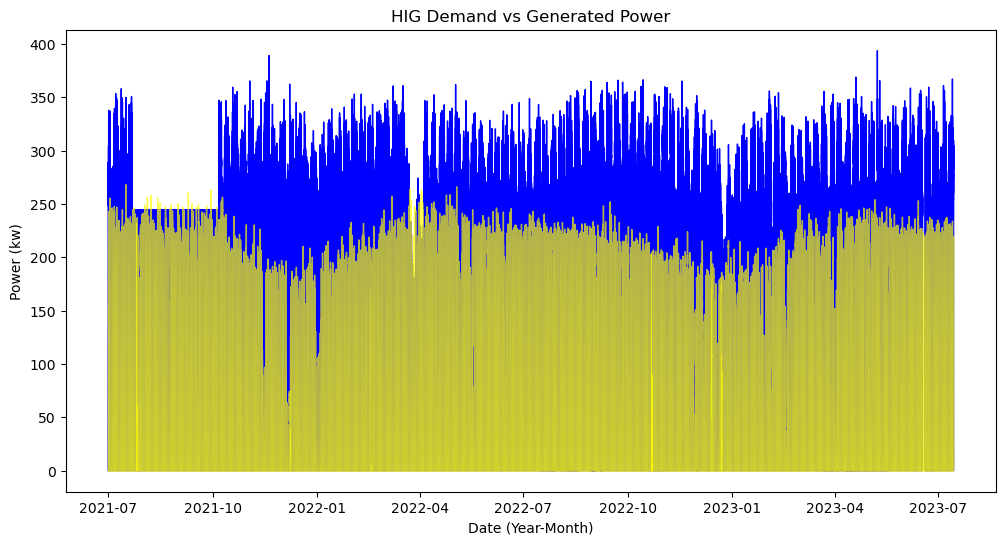

In [112]:

plt.figure(figsize=(12,6))
plt.fill_between(pvload.index, pvload.kw_x, color="blue")
plt.fill_between(pvload.index, pvload.kw_y, color='yellow', alpha=0.7)
plt.title("HIG Demand vs Generated Power")
plt.xlabel("Date (Year-Month)")
plt.ylabel("Power (kw)")


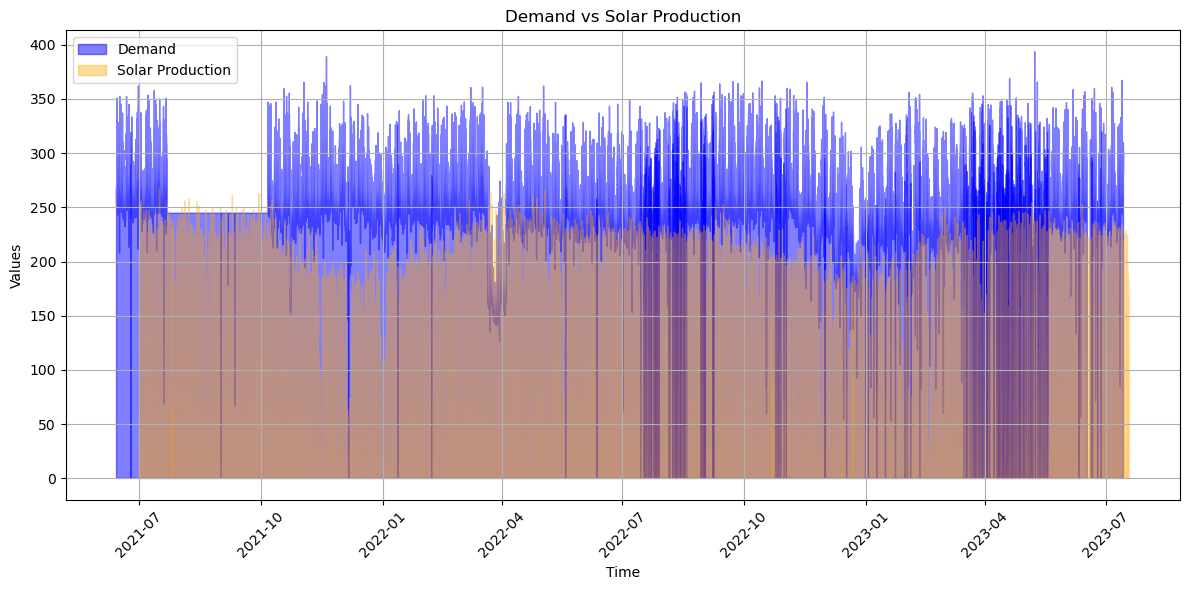

In [113]:
#Overlaying graphs 

plt.figure(figsize=(12, 6))

# Plot Demand
line1 = plt.fill_between(hig.index, hig_kw['kw'], color='blue', alpha=0.5, label='Demand')  # Fill under the demand line

# Plot Solar Production
line2 = plt.fill_between(parking.index, parking_kw['kw'], color='orange', alpha=0.4,label='Solar Production')  # Fill under the solar production line

# Add titles and labels
plt.title('Demand vs Solar Production')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()  # Add a legend
plt.grid()

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [122]:
#Find Maximum demand day
#hig_daily_data = hig_kw.resample('D').sum()
hig_max_load = hig_kw['kw'].max()
hig_max_daily_load = hig_kw[hig_kw['kw'] == hig_max_load]
hig_max_daily_date = hig_max_daily_load.index.date
for date in hig_max_daily_date:
    print(date)

2023-05-08


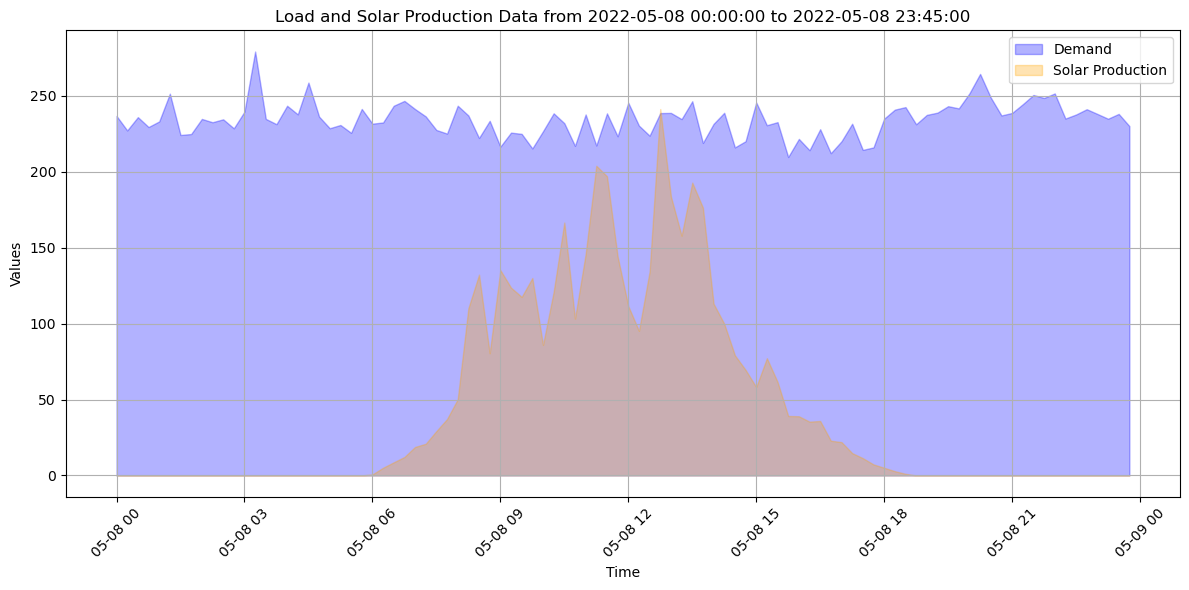

In [126]:
#Plot Max demand Day

# Specify the start and end time within the specific date
start_time = '2022-05-08 00:00:00'
end_time = '2022-05-08 23:45:00'

# Filter the DataFrame for that specific time range
hig_time_filtered_data = hig_kw.loc[start_time:end_time]
parking_time_filtered_data = parking_kw.loc[start_time:end_time]
# Create a plot for the specific time range
plt.figure(figsize=(12, 6))

# Plot Load data
plt.fill_between(hig_time_filtered_data.index, hig_time_filtered_data['kw'], color='blue', alpha=0.3, label='Demand')

# Plot Solar Production data
plt.fill_between(parking_time_filtered_data.index, parking_time_filtered_data['kw'], color='orange', alpha=0.3,label='Solar Production')

# Add titles and labels
plt.title(f'Load and Solar Production Data from {start_time} to {end_time}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()  # Add a legend
plt.grid()

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [129]:
#Find dat with Min demand
filtered_df = hig_kw[hig_kw['kw'] > 0]  # Replace 'kw' with the actual name of the column you are analyzing
daily_min = filtered_df.resample('D')['kw'].min()
if not daily_min.empty:
    # Find the day with the lowest minimum kw
    lowest_min_day = daily_min.idxmin()  
    print(lowest_min_day.date())

2023-01-19


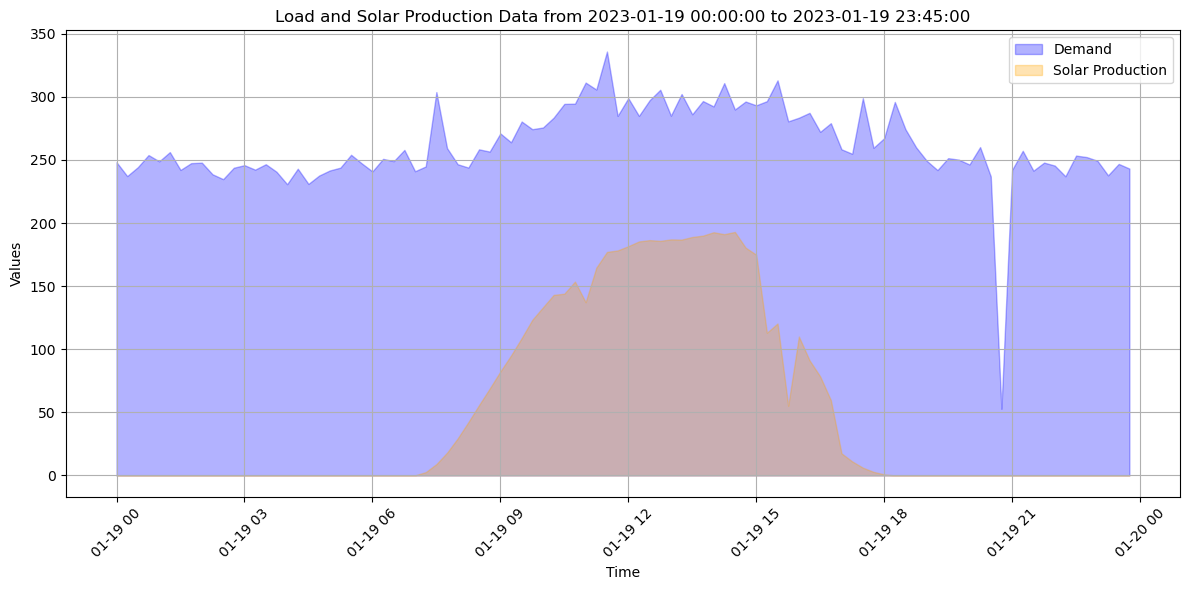

In [131]:
#Plot min load day (Tried to find the day with the least amount of kw, but
# it looks like it is corrupted.)

# Specify the start and end time within the specific date
start_time = '2023-01-19 00:00:00'
end_time = '2023-01-19 23:45:00'

# Filter the DataFrame for that specific time range
hig_time_filtered_data = hig_kw.loc[start_time:end_time]
parking_time_filtered_data = parking_kw.loc[start_time:end_time]
# Create a plot for the specific time range
plt.figure(figsize=(12, 6))

# Plot Load data
plt.fill_between(hig_time_filtered_data.index, hig_time_filtered_data['kw'], color='blue', alpha=0.3, label='Demand')

# Plot Solar Production data
plt.fill_between(parking_time_filtered_data.index, parking_time_filtered_data['kw'], color='orange', alpha=0.3, label='Solar Production')

# Add titles and labels
plt.title(f'Load and Solar Production Data from {start_time} to {end_time}')
plt.xlabel('Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()  # Add a legend
plt.grid()

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()